<a href="https://colab.research.google.com/github/osama-ibrahim72/linear-regression/blob/main/HouseData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Authors


###Sohaila Diab 
###Osama Ibrahim 
###Rawan Khaled 

# Imports

In [ ]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from IPython.display import display, Math, Latex
sns.set( color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import copy
import math

# Importing the data

In [ ]:
df = pd.read_csv('/content/USA_Housing.csv')
df.drop(columns=['Address'], inplace = True)
df.columns = ['avg_area_income', 'avg_area_house_age', 'avg_area_num_rooms', 'avg_area_num_bedrooms', 'area_population', 'price']
df.head()

,avg_area_income,avg_area_house_age,avg_area_num_rooms,avg_area_num_bedrooms,area_population,price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


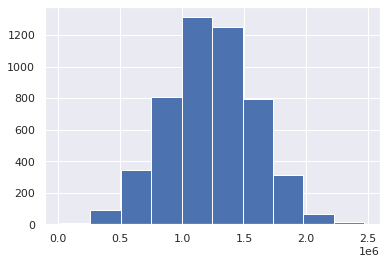

In [ ]:
plt.hist(df.price);

# Understanding the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   avg_area_income        5000 non-null   float64
 1   avg_area_house_age     5000 non-null   float64
 2   avg_area_num_rooms     5000 non-null   float64
 3   avg_area_num_bedrooms  5000 non-null   float64
 4   area_population        5000 non-null   float64
 5   price                  5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
df.describe()

,avg_area_income,avg_area_house_age,avg_area_num_rooms,avg_area_num_bedrooms,area_population,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


We forgot to do a box plot

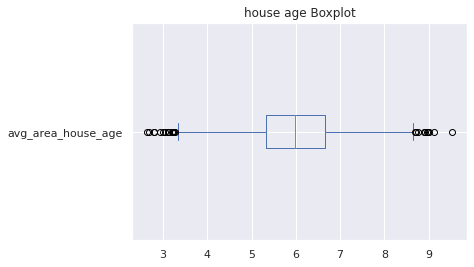

In [ ]:
df['avg_area_house_age'].plot(kind="box", vert=False)
plt.title("house age Boxplot");

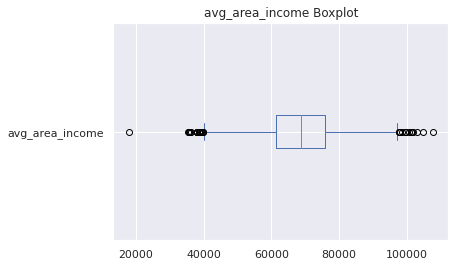

In [ ]:
df['avg_area_income'].plot(kind="box", vert=False)
plt.title("avg_area_income Boxplot");

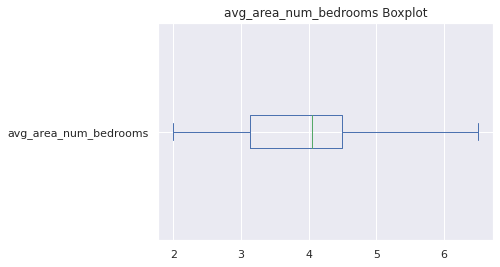

In [ ]:
df['avg_area_num_bedrooms'].plot(kind="box", vert=False)
plt.title("avg_area_num_bedrooms Boxplot");

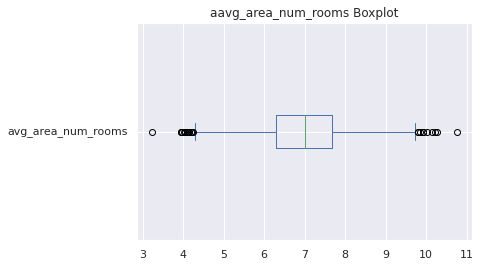

In [ ]:
df['avg_area_num_rooms'].plot(kind="box", vert=False)
plt.title("aavg_area_num_rooms Boxplot");

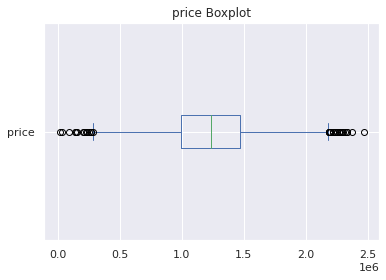

In [ ]:
df['price'].plot(kind="box", vert=False)
plt.title("price Boxplot");

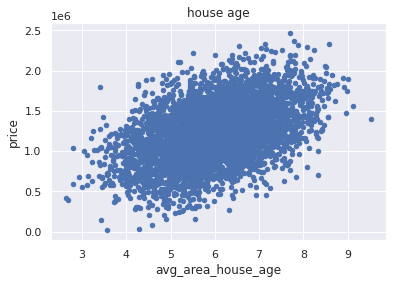

In [ ]:
df.plot(kind="scatter", x="avg_area_house_age", y="price")
plt.title("house age");

Text(0.5, 1.0, 'house income')

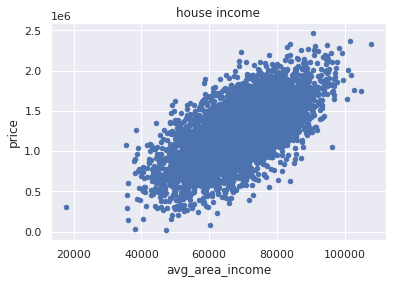

In [ ]:
df.plot(kind="scatter", x="avg_area_income", y="price")
plt.title("house income")

Text(0.5, 1.0, 'bed rooms')

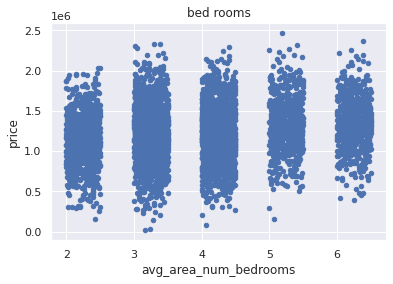

In [ ]:
df.plot(kind="scatter", x="avg_area_num_bedrooms", y="price")
plt.title("bed rooms")

# Min-max feature scaling (Normalization)

Rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range.

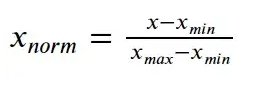

In [ ]:
def min_max_scaling(df, target=True):
  '''
    inputs:
      df : DataFrame 
    output:
      Normalized DataFrame
  '''
    # Copy the dataframe to avoid altering the orginal
  df_normalized = df.copy()
    # Apply min-max scaling
  for column in df_normalized.columns:
    if column=='price' and target==False:
      pass
    else:
      df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / (df_normalized[column].max() - df_normalized[column].min())
      
  return df_normalized

In [ ]:
df_norm = min_max_scaling(df)
df_norm

,avg_area_income,avg_area_house_age,avg_area_num_rooms,avg_area_num_bedrooms,area_population,price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702
...,...,...,...,...,...,...
4995,0.475738,0.754359,0.385619,0.324444,0.326351,0.425683
4996,0.675097,0.633450,0.444024,0.448889,0.366362,0.597881
4997,0.507135,0.670026,0.208534,0.028889,0.476515,0.413672
4998,0.558419,0.420389,0.517579,0.764444,0.611282,0.482127


# Built-in function to split the data to (train &test)


In [ ]:
X = np.array(df_norm.iloc[:,:-1])
y = np.array(df_norm.iloc[:,-1:])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
len(X_train), len(X_test)

(4000, 1000)

In [ ]:
def mean_squared_error(y_true, y_predicted):
	# Calculating the loss or cost
	cost = np.sum((y_true-y_predicted)**2) / len(y_true)
	return cost

# Training The Model

## Cost Function

In [ ]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

## Gradient Function


In [ ]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

## Gradient Descent

In [ ]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(compute_gradient(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}")
        
    return w, b, J_history #return final w,b and J history for graphing

In [ ]:
# initialize parameters
initial_w = np.array([0.01, 0.02, 0.03, 0.04, 0.05])
initial_b = 0.01
# some gradient descent settings
iterations = 700
alpha = 0.1
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, alpha, iterations)
print(f"b,w found by gradient descent: {b_final}.format,{w_final}")

Iteration 0: Cost (array([-0.3161316]), array([-0.18910978, -0.16161629, -0.16182776, -0.14101848, -0.17055991]))
Iteration 70: Cost (array([0.00504925]), array([-0.0059373 , -0.00405219, -0.00026972,  0.0038996 , -0.0025856 ]))
Iteration 140: Cost (array([0.00510502]), array([-0.00537027, -0.00348874, -0.00057041,  0.00239009, -0.00221811]))
Iteration 210: Cost (array([0.00502837]), array([-0.00492101, -0.00305917, -0.00076252,  0.00147045, -0.0019675 ]))
Iteration 280: Cost (array([0.00487667]), array([-0.00455019, -0.0027203 , -0.00088468,  0.00091233, -0.00178857]))
Iteration 350: Cost (array([0.00468478]), array([-0.00423328, -0.0024446 , -0.00096109,  0.00057545, -0.00165378]))
Iteration 420: Cost (array([0.00447382]), array([-0.00395483, -0.00221431, -0.00100704,  0.00037365, -0.00154637]))
Iteration 490: Cost (array([0.00425641]), array([-0.00370504, -0.00201774, -0.00103227,  0.00025405, -0.00145621]))
Iteration 560: Cost (array([0.00403999]), array([-0.00347756, -0.00184708, 

In [ ]:
w_final, b_final

(array([0.42382863, 0.29620927, 0.17812049, 0.03041533, 0.27163503]),
 array([-0.12707659]))

## Predict

In [ ]:
m,_ = X_test.shape
y_preds = []
for i in range(m):
    y_pred = np.dot(X_test[i], w_final) + b_final
    y_preds.append(y_pred)
    print(f"prediction: {y_pred}, target value: {y_test[i]}")

prediction: [0.5243687], target value: [0.53937585]
prediction: [0.50578937], target value: [0.50378784]
prediction: [0.49138741], target value: [0.53978304]
prediction: [0.49347846], target value: [0.57704677]
prediction: [0.44395214], target value: [0.41841898]
prediction: [0.56169874], target value: [0.62751822]
prediction: [0.46688792], target value: [0.50341612]
prediction: [0.41263107], target value: [0.41719898]
prediction: [0.40794752], target value: [0.33285539]
prediction: [0.54861842], target value: [0.57262003]
prediction: [0.36702787], target value: [0.24370922]
prediction: [0.58610254], target value: [0.68747661]
prediction: [0.45767227], target value: [0.36592009]
prediction: [0.6268809], target value: [0.67653189]
prediction: [0.51112755], target value: [0.51494373]
prediction: [0.47209912], target value: [0.38063491]
prediction: [0.56191624], target value: [0.55319422]
prediction: [0.45184206], target value: [0.46170674]
prediction: [0.38740694], target value: [0.33875

###Evaluate

In [ ]:
# RMSE function
def rmse(y, y_pred):
  ''' 
    Find the RMSE (Root Mean Squared Error)

    input:
      y: actual values
      y_pred: prediction
    output:
      root mean squared error
  '''
  se = (y - y_pred) ** 2
  mse = se.mean()
  
  return np.sqrt(mse)

In [ ]:
y_preds = np.concatenate(y_preds).ravel().tolist()
dataset = pd.DataFrame({'pred': y_preds, 'actual': y_test.flatten(), 'error':abs(y_preds-y_test.flatten())}, columns=['pred', 'actual', 'error'])
dataset

,pred,actual,error
0,0.524369,0.539376,0.015007
1,0.505789,0.503788,0.002002
2,0.491387,0.539783,0.048396
3,0.493478,0.577047,0.083568
4,0.443952,0.418419,0.025533
...,...,...,...
995,0.444912,0.444776,0.000136
996,0.510825,0.566447,0.055622
997,0.660265,0.777871,0.117606
998,0.596360,0.634013,0.037653


In [ ]:
rmse(y_preds, y_test.flatten())

0.07109987250744426

# Without scaling the target variable

In [ ]:
df_norm_2 = min_max_scaling(df, target=False)
df_norm_2

,avg_area_income,avg_area_house_age,avg_area_num_rooms,avg_area_num_bedrooms,area_population,price
0,0.686822,0.441986,0.501502,0.464444,0.329942,1.059034e+06
1,0.683521,0.488538,0.464501,0.242222,0.575968,1.505891e+06
2,0.483737,0.468609,0.701350,0.695556,0.528582,1.058988e+06
3,0.506630,0.660956,0.312430,0.280000,0.491549,1.260617e+06
4,0.469223,0.348556,0.611851,0.495556,0.376988,6.309435e+05
...,...,...,...,...,...,...
4995,0.475738,0.754359,0.385619,0.324444,0.326351,1.060194e+06
4996,0.675097,0.633450,0.444024,0.448889,0.366362,1.482618e+06
4997,0.507135,0.670026,0.208534,0.028889,0.476515,1.030730e+06
4998,0.558419,0.420389,0.517579,0.764444,0.611282,1.198657e+06


In [ ]:
X_2 = np.array(df_norm_2.iloc[:,:-1])
y_2 = np.array(df_norm_2.iloc[:,-1:])

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20, random_state=42)

In [ ]:
# run gradient descent 
w_final_2, b_final_2, J_hist_2 = gradient_descent(X_train_2, y_train_2, initial_w, initial_b, alpha, iterations)
print(f"b,w found by gradient descent: {b_final_2}.format,{w_final_2}")

Iteration 0: Cost (array([-946088.45363651]), array([-560458.3798767 , -479833.08666821, -484452.08083983,
       -428569.31967395, -508845.57927286]))
Iteration 70: Cost (array([13373.26438665]), array([-13670.91984673,  -9549.3865855 ,  -1086.03348547,   7305.24985866,
        -7173.62228421]))
Iteration 140: Cost (array([13258.13529831]), array([-12492.6693758 ,  -8332.89946398,  -1689.51583343,   4461.22906646,
        -6288.23207493]))
Iteration 210: Cost (array([12905.18320092]), array([-11539.93462047,  -7384.10883809,  -2078.52767373,   2735.65175135,
        -5642.8139805 ]))
Iteration 280: Cost (array([12422.52258064]), array([-10738.35401357,  -6619.57063488,  -2327.61282015,   1694.57125623,
        -5149.54084865]))
Iteration 350: Cost (array([11875.59150006]), array([-10041.5790398 ,  -5985.7669138 ,  -2483.75112342,   1071.47406489,
        -4754.36981515]))
Iteration 420: Cost (array([11303.66198672]), array([-9420.50640088, -5447.84993128, -2576.83411621,   702.7908575

In [ ]:
w_final_2, b_final_2

(array([1039862.09032059,  718653.88889675,  426109.06507936,
          75130.30695501,  641486.56321973]), array([-273772.35321518]))

In [ ]:
m,_ = X_test_2.shape
y_preds_2 = []
for i in range(m):
    y_pred_2 = np.dot(X_test_2[i], w_final_2) + b_final_2
    y_preds_2.append(y_pred_2)
    print(f"prediction: {y_pred_2}, target value: {y_test[i]}")

prediction: [1299195.95285714], target value: [0.53937585]
prediction: [1253177.02123481], target value: [0.50378784]
prediction: [1223389.84868913], target value: [0.53978304]
prediction: [1229257.11849355], target value: [0.57704677]
prediction: [1103530.1524238], target value: [0.41841898]
prediction: [1391066.04642758], target value: [0.62751822]
prediction: [1159868.2806344], target value: [0.50341612]
prediction: [1031515.90019645], target value: [0.41719898]
prediction: [1019514.22801002], target value: [0.33285539]
prediction: [1361494.33942285], target value: [0.57262003]
prediction: [920789.07140526], target value: [0.24370922]
prediction: [1442423.83561489], target value: [0.68747661]
prediction: [1137091.66940938], target value: [0.36592009]
prediction: [1551001.44218938], target value: [0.67653189]
prediction: [1265280.15811714], target value: [0.51494373]
prediction: [1173901.00422485], target value: [0.38063491]
prediction: [1391143.72436426], target value: [0.55319422]


In [ ]:
y_preds_2 = np.concatenate(y_preds_2).ravel().tolist()
dataset_2 = pd.DataFrame({'pred': y_preds_2, 'actual': y_test_2.flatten(), 'error':abs(y_preds_2-y_test_2.flatten())}, columns=['pred', 'actual', 'error'])
dataset_2

,pred,actual,error
0,1.299196e+06,1339096.077,39900.124143
1,1.253177e+06,1251794.179,1382.842235
2,1.223390e+06,1340094.966,116705.117311
3,1.229257e+06,1431507.623,202250.504506
4,1.103530e+06,1042373.524,61156.628424
...,...,...,...
995,1.113108e+06,1107031.246,6076.990814
996,1.269382e+06,1405505.244,136123.474272
997,1.630960e+06,1924155.582,293195.321607
998,1.476803e+06,1571253.531,94450.403975


In [ ]:
rmse(y_preds_2, y_test_2.flatten())

176365.5275670002